## Import

In [ ]:
import torch

from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader

import torch.nn as nn
import torch.optim as opt
from torch.autograd import Variable

import matplotlib.pyplot as plt

## Dataset - MNIST


In [ ]:
train_dataset = datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor(), download=False)

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
train_dataset.data.shape # 6000 sample, 28x28 

torch.Size([60000, 28, 28])

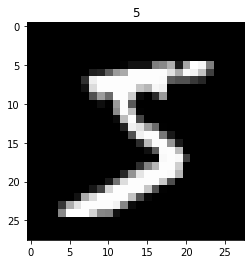

In [ ]:
# plot first image
plt.imshow(train_dataset.data[0], cmap='gray')
plt.title('%i' %train_dataset.targets[0])
plt.show()

## Dataloader

In [ ]:
# Define batch_size
train_batch_size = 100
test_batch_size = 10000

# Create Dataloader 
train_loader = DataLoader(
    dataset = train_dataset,
    batch_size = train_batch_size,
    shuffle = True
)

test_loader = DataLoader(
    dataset = test_dataset,
    batch_size = test_batch_size,
    shuffle = False
)

In [ ]:
for image, label in train_loader:
    print(image.shape, label.shape)
    break

torch.Size([100, 1, 28, 28]) torch.Size([100])


## Model

In [ ]:
# hyperparameters
input_size = 28 * 28
num_class = 10
hidden_size = 500

In [ ]:
class ANN(nn.Module):
    def __init__(self, input_size, hidden_size, num_class):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(
            in_features=input_size,
            out_features=hidden_size
        )
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(
            in_features=hidden_size,
            out_features=num_class
        )
    
    def forward(self, x):
        output = self.fc1(x)
        output = self.relu(output)
        output = self.fc2(output)
        return output        

In [ ]:
model = ANN(
    input_size=input_size,
    hidden_size=hidden_size,
    num_class=num_class 
)

print(model)

ANN(
  (fc1): Linear(in_features=784, out_features=500, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)


## Loss Fuction & Optimzer

In [ ]:
# hyperparameter
learning_rate = 0.001

loss_func = nn.CrossEntropyLoss()
optimizer = opt.Adam(model.parameters(), lr=learning_rate)

## Training Model

In [ ]:
# hyperparameter
num_epoch = 5

In [ ]:
for epoch in range(num_epoch):
    for i, (images, labels) in enumerate(train_loader):
        # images are 100(batch_size) * 28*28 tensor.
        images = Variable(images.view(-1, 28*28)) # -1 means 100 here
        labels = Variable(labels)
        
        optimizer.zero_grad() # clear buffer
        output = model(images) # forward pass
        loss = loss_func(output, labels) # calculate loss
        
        loss.backward() # backward pass
        optimizer.step() # update weights
        
        if (i+1) % 200 == 0:
            print('Epoch: {}, Batch: {}, Loss: {}'.format(epoch+1, i+1, loss.data))

Epoch: 1, Batch: 200, Loss: 0.27631157636642456
Epoch: 1, Batch: 400, Loss: 0.1740310788154602
Epoch: 1, Batch: 600, Loss: 0.16818885505199432
Epoch: 2, Batch: 200, Loss: 0.10454821586608887
Epoch: 2, Batch: 400, Loss: 0.08204076439142227
Epoch: 2, Batch: 600, Loss: 0.09805747121572495
Epoch: 3, Batch: 200, Loss: 0.04931078851222992
Epoch: 3, Batch: 400, Loss: 0.08845331519842148
Epoch: 3, Batch: 600, Loss: 0.06305500119924545
Epoch: 4, Batch: 200, Loss: 0.03987227752804756
Epoch: 4, Batch: 400, Loss: 0.014862917363643646
Epoch: 4, Batch: 600, Loss: 0.09499024599790573
Epoch: 5, Batch: 200, Loss: 0.010717170313000679
Epoch: 5, Batch: 400, Loss: 0.04710618034005165
Epoch: 5, Batch: 600, Loss: 0.02130652405321598


## Testing Model

* Calculate accuracy

In [ ]:
correct = 0
total = 0

for images, labels in test_loader:
    images = Variable(images.view(-1, 28*28))
    labels = Variable(labels)
    
    output = model(images)
    _, predicted = torch.max(output.data, 1) # 1 means by column;
    
    total += labels.size(0) # len;
    correct += (predicted == labels).sum()
    
print('accuracy: {} %'.format(correct/total * 100))

accuracy: 97.72999572753906 %


## Save & Load Model

* Method 1: save model's weight
* Method 2: save entire model

In [ ]:
# method 1: save model weight
torch.save(model.state_dict(), 'model.pkl')

# load weight
model = ANN(input_size, hidden_size, num_class)
model.load_state_dict(torch.load('model.pkl'))

<All keys matched successfully>

In [ ]:
# method 2: save entire model
torch.save(model, 'model2.pkl')
model3 = torch.load('model2.pkl')